<a href="https://colab.research.google.com/github/AntonioWanderer/ML-studying/blob/main/%D0%A6%D0%B8%D1%84%D0%B5%D1%80%D0%BA%D0%B8_%D1%81%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D1%8C%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#includes
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

In [30]:
#downloading
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [31]:
#normalised
x_train = x_train / 255
x_test = x_test / 255

In [32]:
#converting outputs to vectors by cattegories
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

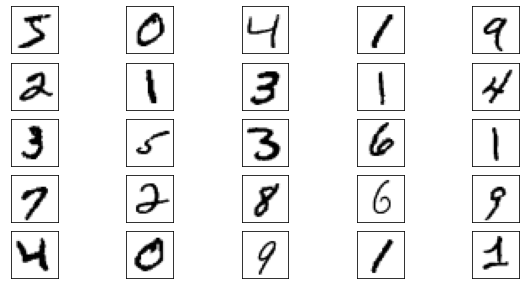

In [33]:
#example of images from the dataset
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [21]:
x_train = np.expand_dims(x_train,axis = 3)
x_test = np.expand_dims(x_test,axis = 3)

In [34]:
#creating network model

model = keras.Sequential([
  Conv2D(32,(3,3),padding = 'same',activation = 'relu', input_shape = (28,28,1)),
  MaxPooling2D((2,2),strides = 2),
  Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
  MaxPooling2D((2,2),strides = 2),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(10, activation = 'softmax')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [35]:
#network compiling
model.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [36]:
#learning
model.fit(x_train, y_train_cat,batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1434 - accuracy: 0.9556 - val_loss: 0.0703 - val_accuracy: 0.9778
Epoch 2/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0405 - val_accuracy: 0.9878
Epoch 3/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0533 - val_accuracy: 0.9849
Epoch 4/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0377 - val_accuracy: 0.9894
Epoch 5/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0432 - val_accuracy: 0.9885


In [37]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 4s 13ms/step - loss: 0.0302 - accuracy: 0.9910


[0.030196379870176315, 0.9909999966621399]

[[1.7114673e-09 4.8013778e-08 2.1048518e-09 2.5831534e-06 1.0113058e-11
  5.0422344e-12 7.6438318e-16 9.9998689e-01 4.6039825e-09 1.0443409e-05]]
Распознанная цифра: 7


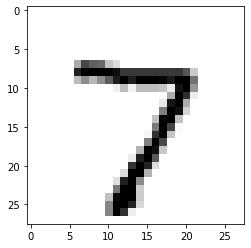

[[1.4488590e-07 6.9995751e-09 9.9999988e-01 4.3142790e-13 6.3107803e-13
  5.2793099e-15 7.0995815e-10 9.9734552e-14 3.6808916e-09 8.3677527e-12]]
Распознанная цифра: 2


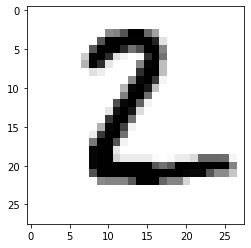

[[1.5783827e-06 9.9996185e-01 3.6682104e-07 7.3701050e-09 1.0155451e-06
  3.4775769e-06 2.1699128e-07 2.5312982e-05 4.9652540e-06 1.1930915e-06]]
Распознанная цифра: 1


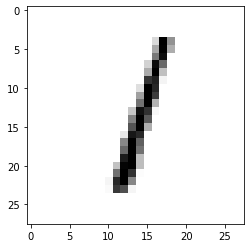

[[9.9999261e-01 1.1642345e-11 5.5684745e-06 4.7637658e-09 3.0138476e-09
  6.3151995e-10 1.5789235e-06 3.8814183e-09 5.7552391e-08 1.7415636e-07]]
Распознанная цифра: 0


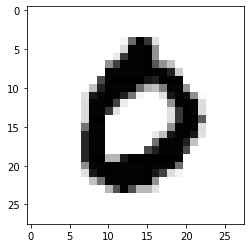

[[3.0667968e-09 1.2231382e-08 3.4750386e-08 4.2236256e-10 9.9996793e-01
  3.0185582e-10 1.3753556e-08 5.7698418e-10 1.0893493e-05 2.1160124e-05]]
Распознанная цифра: 4


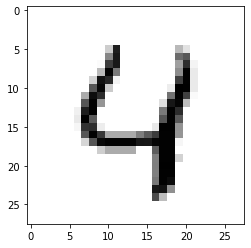

In [38]:
#tesing of network
for n in range(5):
  x = np.expand_dims(x_test[n], axis=0)
  res = model.predict(x)
  print(res)
  print(f"Распознанная цифра: {np.argmax(res)}")

  plt.imshow(x_test[n], cmap=plt.cm.binary)
  plt.show()

In [39]:
#all seq recognition
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [40]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = y_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(90, 28, 28)


Значение сети:  9  а предполагалось что это  7


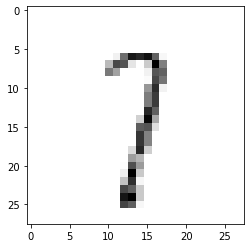

Значение сети:  0  а предполагалось что это  6


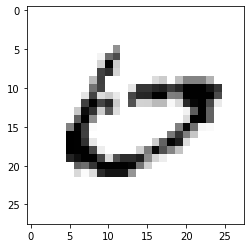

Значение сети:  5  а предполагалось что это  3


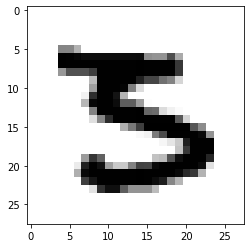

Значение сети:  4  а предполагалось что это  6


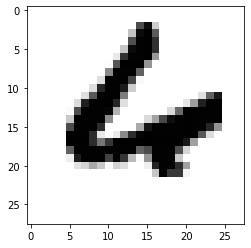

Значение сети:  4  а предполагалось что это  2


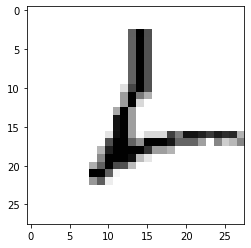

In [41]:
for i in range(5):
  print("Значение сети: ",str(p_false[i])," а предполагалось что это ", y_false[i])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()